In [24]:
from pandas import read_csv, to_datetime, read_excel
import numpy as np
import pandas as pd
from scipy.stats import norm
from pylab import rcParams
rcParams['figure.figsize'] = 6, 15

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:
nifty = read_excel('NIFTYoptiondata.xlsx')

In [8]:
nifty['Date'] = pd.to_datetime(nifty['Date'])
nifty['Expiry'] = pd.to_datetime(nifty['Expiry'])
nifty['Maturity'] = nifty['Expiry']-nifty['Date']

In [11]:
nifty['Maturity'] = pd.to_numeric(nifty['Maturity'])

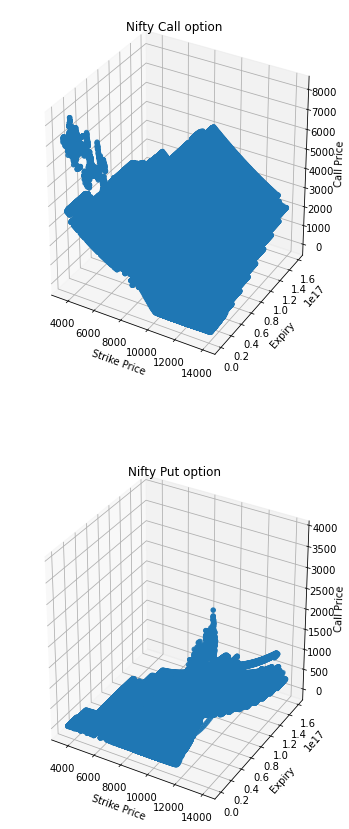

In [25]:
fig = plt.figure()
plt1 = fig.add_subplot(211, projection='3d') 
plt2 = fig.add_subplot(212, projection='3d') 
plt1.scatter(nifty['Strike Price'], nifty['Maturity'], nifty['Call Price'])
plt1.set_xlabel('Strike Price')
plt1.set_ylabel('Expiry')
plt1.set_zlabel('Call Price')
plt1.set_title('Nifty Call option')
plt2.scatter(nifty['Strike Price'], nifty['Maturity'], nifty['Put Price'])
plt2.set_xlabel('Strike Price')
plt2.set_ylabel('Expiry')
plt2.set_zlabel('Call Price')
plt2.set_title('Nifty Put option')
plt.show()

In [ ]:
stocks = ['AXISBANK', 'HDFC', 'ITC', 'RELIANCE', 'TATAMOTORS', 'TCS']

# axisbank = read_excel('stockoptiondata/AXISBANK.xlsx')
for stock in stocks:
    df = read_excel('stockoptiondata/'+stock+'.xlsx')
    ax = fig.add_subplot(111, projection='3d') # Axe3D object
    ax.scatter(x, y, z_call, c='c', marker='o', label='Call Option')
    ax.scatter(x, y, z_put, c='g', marker='o', label='Put Option')

In [7]:
optionData = read_excel('NIFTYoptiondata.xlsx')
stockData = read_csv("./Data/nsedata1.csv")
optionData['Date2'] = to_datetime(optionData['Date'])
stockData['Date2'] = to_datetime(stockData['Date'])
stockData = stockData[['Date2','Close']]
data = optionData.merge(stockData,on='Date2')

In [8]:
data.head()

,Symbol,Date,Expiry,Strike Price,Put Price,Call Price,Date2,Close
0,NIFTY,01-Jan-2014,30-Jan-2014,7800,1341.90,1.00,2014-01-01,6301.65
1,NIFTY,01-Jan-2014,30-Jan-2014,7550,1111.85,0.25,2014-01-01,6301.65
2,NIFTY,01-Jan-2014,30-Jan-2014,7850,1387.35,3.60,2014-01-01,6301.65
3,NIFTY,01-Jan-2014,30-Jan-2014,7700,1248.90,2.75,2014-01-01,6301.65
4,NIFTY,01-Jan-2014,30-Jan-2014,7250,849.65,1.55,2014-01-01,6301.65


In [9]:
numSample = 1000
mask = np.random.randint(0, len(data), numSample)
data = data.loc[mask]

In [10]:
data.head()

,Symbol,Date,Expiry,Strike Price,Put Price,Call Price,Date2,Close
13555,NIFTY,22-Jan-2014,29-Jun-2017,7700,425.05,2558.60,2014-01-22,6338.95
8256,NIFTY,14-Jan-2014,30-Jun-2016,4000,99.00,2612.45,2014-01-14,6241.85
42898,NIFTY,12-Mar-2014,28-Dec-2017,4200,0.85,3122.55,2014-03-12,6516.90
22185,NIFTY,05-Feb-2014,28-Dec-2017,6300,55.10,2868.90,2014-02-05,6022.40
18064,NIFTY,30-Jan-2014,30-Jan-2014,5500,0.05,1583.25,2014-01-30,6073.70


In [11]:
len(data)

1000

In [12]:
import matplotlib.dates as mdates

In [13]:
plot_data = orig_data[:numSample]

In [14]:
def plotPrices(plot_data):
    dates = to_datetime(plot_data['Expiry'])
    x = to_datetime(dates)
    x = mdates.date2num(x)

    y = plot_data['Strike Price']
    z_call = plot_data['Call Price']
    z_put = plot_data['Put Price']

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z_call, c='b', marker='.', label='Call Option')

    plt.xticks(x, data['Expiry'], rotation=90)
    ax.set_xlabel('Maturity Date')
    ax.set_ylabel('Strike Price')
    ax.set_zlabel('Option Prices')
    ax.legend()

    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z_put, c='r', marker='.', label='Put Option')

    plt.xticks(x, data['Expiry'], rotation=90)
    ax.set_xlabel('Maturity Date')
    ax.set_ylabel('Strike Price')
    ax.set_zlabel('Option Prices')
    ax.legend()

    plt.show()

In [15]:
plotPrices(plot_data)

In [20]:
from IPython.core.display import display, HTML

In [26]:
display(HTML('<h3 style="text-align:center;">Maturity in days vs Strike Price vs Option Prices</h3>'))
display(HTML('<img src="Figure_3.png" alt="Drawing" style="width: 600px;"/>'))
display(HTML('<img src="Figure_4.png" alt="Drawing" style="width: 600px;"/>'))

In [17]:
def getCall(S, K, r, t, sig):
    d1 = (np.log(S/K)+t*(r+(sig**2)/2))/(sig*(t**0.5))
    d2 = d1-sig*(t**0.5)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    C = S*Nd1 - K*np.exp(-r*t)*Nd2
    return C

In [18]:
def getPut(S, K, r, t, sig):
    d1 = (np.log(S/K)+t*(r+(sig**2)/2))/(sig*(t**0.5))
    d2 = d1-sig*(t**0.5)
    Nd1 = norm.cdf(-d1)
    Nd2 = norm.cdf(-d2)
    P = K*np.exp(-r*t)*Nd2 - S*Nd1
    return P

In [19]:
def f(Price, St, K, r, t, sig, option='Call'):
    if option is 'Call':
        return getCall(St, K, r, t, sig)-Price
    else:
        return getPut(St, K, r, t, sig)-Price

In [20]:
def Secant(Price, St, K, r, t, option='Call'):
    x0 = 0.1
    x1 = 0.2
    
    tol = 0.00001
    num = 100
    alpha = 0.1
    for i in range(num):
        x2 = x1 - f(Price, St, K, r, t, x1, option)*(x1-x0)/(f(Price, St, K, r, t, x1, option)-f(Price, St, K, r, t, x0, option)+alpha)
        x0 = x1
        x1 = x2
#         print(x1, f(Price, St, K, r, t, x1, option))
        if abs(f(Price, St, K, r, t, x1, option)) < tol:
            break
    return x1

In [21]:
from datetime import datetime

In [22]:
num = len(data)
sig_c = np.zeros(num)
for i in range(num):
    St = data.iloc[-i]['Close']
    r = 0.05
    init_date=data.iloc[-i]['Date']
    exp_date=data.iloc[-i]['Expiry']
    
    date_format = "%d-%b-%Y"
    d0 = datetime.strptime(init_date, date_format)
    d1 = datetime.strptime(exp_date, date_format)
    t = (d1-d0).days/252
    K = data.iloc[-i]['Strike Price']
    P = data.iloc[-i]['Put Price']
    C = data.iloc[-i]['Call Price']
    
    sig_c[i] = Secant(C, St, K, r, t, 'Call')
    if abs(sig_c[i]) > 10:
        sig_c[i] = np.nan
#     if i%50 is 0:
#         print(str(i+1)+"/"+str(num))

/home/epsilon/.virtualenvs/finance/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/home/epsilon/.virtualenvs/finance/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/home/epsilon/.virtualenvs/finance/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/home/epsilon/.virtualenvs/finance/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [23]:
data.head()

,Symbol,Date,Expiry,Strike Price,Put Price,Call Price,Date2,Close
13555,NIFTY,22-Jan-2014,29-Jun-2017,7700,425.05,2558.60,2014-01-22,6338.95
8256,NIFTY,14-Jan-2014,30-Jun-2016,4000,99.00,2612.45,2014-01-14,6241.85
42898,NIFTY,12-Mar-2014,28-Dec-2017,4200,0.85,3122.55,2014-03-12,6516.90
22185,NIFTY,05-Feb-2014,28-Dec-2017,6300,55.10,2868.90,2014-02-05,6022.40
18064,NIFTY,30-Jan-2014,30-Jan-2014,5500,0.05,1583.25,2014-01-30,6073.70


In [24]:
data['Volatility']=sig_c
data.drop(['Date2'], axis=1)
data.to_csv('result.csv', index=False)

In [25]:
def plotVolatility(data):
    dates = to_datetime(data['Expiry'])
    x = to_datetime(dates)
    x = mdates.date2num(x)

    y = data['Strike Price']
    z = data['Volatility']

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z, c='b', marker='.', label='Call Option')

    plt.xticks(x, data['Expiry'], rotation=90)
    ax.set_xlabel('Maturity Date')
    ax.set_ylabel('Strike Price')
    ax.set_zlabel('Volatility')
    ax.legend()
    plt.title('Maturity vs Strike Price vs Volatility')
    plt.show()

In [26]:
plotVolatility(data)

In [27]:
display(HTML('<h3 style="text-align:center;">Maturity in days vs Strike Price vs Volatility</h3>'))
display(HTML('<img src="Figure_1.png" alt="Drawing" style="width: 600px;"/>'))
display(HTML('<img src="Figure_2.png" alt="Drawing" style="width: 600px;"/>'))